In [42]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

In [2]:
l = [file_name for file_name in os.listdir() if os.path.splitext(file_name)[1] == '.pickle']

base = pd.concat([pd.read_pickle(path) for path in l], axis=0).reset_index(drop=True)

In [3]:
for col in ['sol', 'sol_gov']:
    base = pd.concat([base.drop(col, axis=1), pd.json_normalize(base[col]).add_suffix('_' + col)], axis=1)

In [30]:
for col in ['cost_sol', 'cost_sol_gov']:
    base[col] = base[col].apply(lambda x: x.flatten())
    base[col] = pd.DataFrame(base[col].to_list()).sum(axis=1)

In [31]:
base[['d_11', 'd_12', 'd_21', 'd_22']] = pd.DataFrame(np.array(base['d'].to_list()).reshape(base.shape[0], 4))

In [32]:
base = base.query('msg_sol == "found solution" & msg_sol_gov == "found solution"').reset_index(drop=True)

In [33]:
base.cost_sol = base.cost_sol.apply(lambda x: x.sum())
base.cost_sol_gov = base.cost_sol_gov.apply(lambda x: x.sum())

AttributeError: 'float' object has no attribute 'sum'

In [35]:
base.query('cost_sol_gov > cost_sol & msg_sol_gov == "found solution"')

,T,I0,d,l,Recovered_rate,ReSusceptible_rate,time,v_sol,v_der_sol,cost_sol,...,v_der_sol_gov,cost_sol_gov,msg_sol_gov,test_results.derv_sol_gov,test_results.cost_derv_sol_gov,test_results.solution_sol_gov,d_11,d_12,d_21,d_22
6,359,0.060216,"[[0.05883290445834066, 0.12041804206483961], [...","[3.0, 9.0]",0,0,18.273908,"[[0.7607878910248507], [0.35217158631113826]]","[[-1.2831560258774743e-09], [-9.16617892698923...",4.924387,...,"[[-3.59377646937555], [3.5937764738928086]]",4.992976,found solution,True,True,True,0.058833,0.120418,0.097252,0.199235
12,495,0.096496,"[[0.11543613115699627, 0.2377391628883521], [0...","[2.0, 14.0]",0,0,23.466196,"[[0.5993639591720391], [0.26553968762364444]]","[[1.629158141724929e-09], [-2.745398575143554e...",7.855946,...,"[[-6.61898064619266], [6.618980643016165]]",8.020483,found solution,True,True,True,0.115436,0.237739,0.046719,0.212940
13,894,0.070640,"[[0.15584979229990026, 0.04564449896142847], [...","[4.0, 8.0]",0,0,42.327493,"[[0.3673780722931216], [0.6584264501056373]]","[[2.381939978590708e-09], [-1.4408412241095903...",5.049174,...,"[[2.4008380857268294], [-2.4008380905340294]]",5.445063,found solution,True,True,True,0.155850,0.045644,0.022658,0.015577
16,663,0.047560,"[[0.12103273275083215, 0.2366381984613836], [0...","[2.0, 10.0]",0,0,31.234413,"[[0.5416714251914162], [0.33617923018685436]]","[[3.438647588893673e-09], [3.811480908666454e-...",5.500891,...,"[[-3.282883994460024], [3.2828839973791446]]",5.581891,found solution,True,True,True,0.121033,0.236638,0.026264,0.158613
22,573,0.072299,"[[0.22338319994235342, 0.00010851220218546787]...","[3.5, 3.5]",0,0,27.128181,"[[0.41306972722734586], [0.6205095014577372]]","[[-1.2974394891784868e-09], [7.647940059030134...",4.656974,...,"[[-0.21997995736225828], [0.21997997120026813]]",4.960045,found solution,True,True,True,0.223383,0.000109,0.202758,0.041712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,620,0.057985,"[[0.12798751464704464, 0.19227480191032684], [...","[4.0, 32.0]",0,0,41.416499,"[[0.455440804889933], [0.26452983981792066]]","[[3.2756126699950983e-09], [-6.906645921844756...",8.908837,...,"[[-6.494820740768228], [6.49482074631354]]",9.004048,found solution,True,True,True,0.127988,0.192275,0.031905,0.133215
541,841,0.060172,"[[0.13376986242059977, 0.04905291482303084], [...","[4.5, 22.5]",0,0,58.151630,"[[0.3972527503453817], [0.6305998912320308]]","[[-4.183323021322849e-09], [-1.32832189692067e...",5.558626,...,"[[2.1024657438638634], [-2.102465739075191]]",5.821699,found solution,True,True,True,0.133770,0.049053,0.006681,0.012280
542,282,0.056693,"[[0.16742138898849548, 0.07761718706284862], [...","[1.0, 10.0]",0,0,16.336419,"[[0.8252348283497726], [0.4254978243693967]]","[[-1.2327652232357877e-09], [2.620126338115369...",3.782421,...,"[[-3.0986355288799716], [3.098635535653549]]",3.848751,found solution,True,True,True,0.167421,0.077617,0.033408,0.189123
553,862,0.020236,"[[0.05637858110737912, 0.12614573023571043], [...","[2.0, 20.0]",0,0,46.029241,"[[0.7095087342986778], [0.2479385982962631]]","[[5.600846453290842e-10], [1.7574208754922438e...",6.116846,...,"[[-8.225068874304128], [8.225068869799157]]",6.286323,found solution,True,True,True,0.056379,0.126146,0.047874,0.198162


<AxesSubplot:>

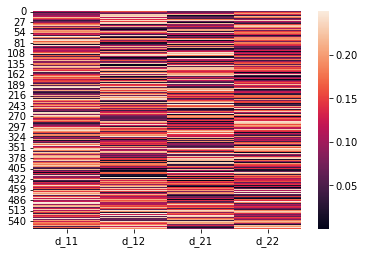

In [43]:
sns.heatmap(base[['d_11', 'd_12', 'd_21', 'd_22']])

In [37]:
base.query('cost_sol > cost_sol_gov')[['d_11', 'd_12', 'd_21', 'd_22']].sum(axis=1).mean()

0.5352548689346586

In [38]:
base.query('cost_sol < cost_sol_gov')[['d_11', 'd_12', 'd_21', 'd_22']].sum(axis=1).mean()

0.4258546243229284

In [39]:
base.query('cost_sol > cost_sol_gov').eval('d_12*d_21').mean()

0.018343999469177436

In [40]:
base.query('cost_sol > cost_sol_gov')[['d_11', 'd_22', 'T']].mean()

d_11      0.140039
d_22      0.123119
T       553.483402
dtype: float64

In [41]:
base.query('cost_sol < cost_sol_gov').eval('d_12*d_21').mean()

0.004261639915904168

In [24]:
base

,T,I0,d,l,Recovered_rate,ReSusceptible_rate,time,v_sol,v_der_sol,cost_sol,msg_sol,v_sol_gov,v_der_sol_gov,cost_sol_gov,msg_sol_gov,d_11,d_12,d_21,d_22
0,914,0.037480,"[[0.8565816349272409, 0.6292831855177051], [0....","[50, 2300]",0,0,29.335019,"[[0.13220528342631357, 0.8116401933875722], [0...","[[4.804618924936221e-10, -8.510906290837283e-0...",591.848974,found solution,"[[0.062481132833233526, 0.062481132833233526],...","[[-239.78417793861823, -250.21161963344957], [...",316.343050,found solution,0.856582,0.629283,0.483606,0.908240
1,210,0.002814,"[[0.1811095865877227, 0.8615772933961338], [0....","[77, 154]",0,0,3.043460,"[[0.5083858220791662, 0.3974059127194974], [0....","[[-2.7481602327128485e-08, -1.6335377495124703...",22.342767,found solution,"[[0.372188959122877, 0.372188959122877], [0.37...","[[-5.350097044444526, -2.5515503095256253], [-...",20.813578,found solution,0.181110,0.861577,0.150991,0.959984
2,448,0.092969,"[[0.27210870926413344, 0.7953386076766586], [0...","[46, 1702]",0,0,12.776767,"[[0.2179515946389642, 0.7376240890846264], [0....","[[8.363087999896379e-12, -1.2317620257107365e-...",621.799149,found solution,"[[0.08044517647035616, 0.08044517647035616], [...","[[-148.10193159888706, -145.07554906301644], [...",450.403564,found solution,0.272109,0.795339,0.902819,0.237061
3,647,0.072381,"[[0.3221893262459786, 0.9652239563946082], [0....","[38, 798]",0,0,16.529536,"[[0.19676556812392365, 0.513278486087027], [0....","[[7.09370340246096e-11, -2.727185588469183e-09...",328.989947,found solution,"[[0.0889846695016355, 0.0889846695016355], [0....","[[-117.29241219513654, -112.9960958740204], [9...",229.319828,found solution,0.322189,0.965224,0.740347,0.458198
4,458,0.051370,"[[0.9731576326301973, 0.2951818004700274], [0....","[7, 35]",0,0,4.466413,"[[0.23738641299054425, 0.9423493485621331], [0...","[[3.0604496714659035e-10, -5.625146348720023e-...",51.060503,found solution,"[[0.22088180515676975, 0.22088180515676975], [...","[[-7.448328917304595, -18.637151466984033], [-...",39.520211,found solution,0.973158,0.295182,0.260556,0.909412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,792,0.025416,"[[0.8212704864063497, 0.2837052908809725], [0....","[20, 140]",0,0,9.007427,"[[0.18024703769729836, 0.7616229153895309], [0...","[[-4.1801584416134574e-10, -9.296900582711487e...",83.575289,found solution,"[[0.15537822189308395, 0.15537822189308395], [...","[[-24.046523310038427, -38.43112421111843], [-...",58.739820,found solution,0.821270,0.283705,0.229973,0.869230
2948,400,0.017882,"[[0.11898628366519559, 0.45504947518363503], [...","[50, 550]",0,0,2.094115,"[[0.42591439004906206, 0.8562517018068917], [0...","[[-1.509903313490213e-14, 2.042810365310288e-1...",87.958068,found solution,"[[0.22615422669284008, 0.22615422669284008], [...","[[-17.2696117909372, -15.22442606717092], [26....",64.403508,found solution,0.118986,0.455049,0.437304,0.121604
2949,903,0.075246,"[[0.3744280344312455, 0.6485019550454362], [0....","[87, 2088]",0,0,6.991305,"[[0.13164969703267537, 0.3750856223525718], [0...","[[1.4622969501942862e-10, -9.226468478118477e-...",616.322075,found solution,"[[0.06294028947463672, 0.06294028947463672], [...","[[-230.19585838102168, -233.5574628223527], [-...",473.486791,found solution,0.374428,0.648502,0.332261,0.522544
2950,657,0.090897,"[[0.49718973502944186, 0.7011242546638777], [0...","[33, 1551]",0,0,3.632560,"[[0.1684279186438112, 0.716381084588251], [0.0...","[[-2.5579538487363607e-12, 2.311484337269576e-...",622.131160,found solution,"[[0.09970753370066586, 0.09970753370066586], [...","[[-83.46315812720917, -90.22237384507537], [22...",449.958674,found solution,0.497190,0.701124,0.390621,0.036780


In [26]:
base.query('cost_sol < cost_sol_gov')[['d_11', 'd_22', 'T']].mean()

d_11      0.502530
d_22      0.172665
T       567.394737
dtype: float64

In [16]:
base.query('cost_sol < cost_sol_gov').shape

(76, 19)

In [17]:
base.query('cost_sol > cost_sol_gov').shape

(2876, 19)